In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X = X.dropna(axis=0)
X2 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X2=X2.rename(columns= {"GX VO2 Max VO2 (mL/kg/min)":'G2',"GX AT VO2 (mL/kg/min)" : "G0", "GX AT VE/VCO2" : "G1",
                        'GX VO2 Max VO2/Pred (%)' : 'G3','GX VO2 Max VO2/HR (mL/beat)':'G4','GX Predicted VO2/HR (mL/beat)':'G5','GX Work Max Work (Watts)':'G6','GX Predicted Work (Watts)':'G7','PF Pre FEV1/FVC (%)':'G8','PF Pre FEV1 (L)':'G9', 'pred mort' : 'predmort'})
X2 = X2.drop(X2[(X2['G8'] == 0.0)|(X2['G9'] == 0.0)].index)

In [3]:
data = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort','LOSbin','LOS']]

In [4]:
y_value = data[['LOSbin']]
x_value = data[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
Data = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort','LOSbin']]

In [33]:
X1 = np.array(x_value)
y1 = np.array(y_value)
loo = LeaveOneOut()
model = LogisticRegression(max_iter=3000)
y_true = []
y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    model.fit(X_train,y_train.ravel())
    pred = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(pred)

In [6]:
y_pred = np.array(y_pred).reshape(-1)
y_true = np.array(y_true).reshape(-1)
accuracy_lg = accuracy_score(y_true,y_pred)

AUC :  0.5350235849056604


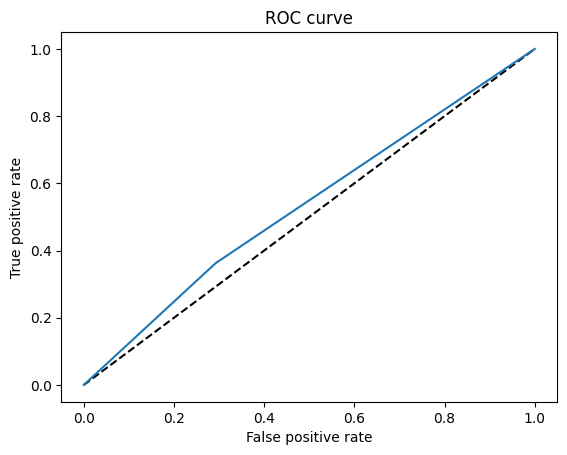

In [7]:
fpr, tpr, thresholds_keras = metrics.roc_curve(y_true, y_pred,pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
auc_lg = auc

In [8]:
los = X2[['LOS']]
mean = np.mean(los)
sd = np.std(los)
sd

/Users/beckhol/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LOS    6.512395
dtype: float64

(0.0, 50.0)

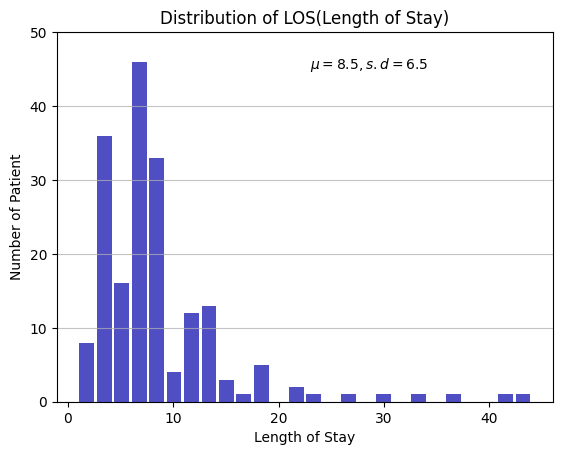

In [9]:
n, bins, patches = plt.hist(x=los, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Length of Stay')
plt.ylabel('Number of Patient')
plt.title('Distribution of LOS(Length of Stay)')
plt.text(23, 45, r'$\mu=8.5, s.d=6.5$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
neigh = KNeighborsClassifier(n_neighbors=5)
knn_y_true = []
knn_y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    neigh.fit(X_train,y_train.ravel())
    pred = neigh.predict(X_test)
    knn_y_true.append(y_test)
    knn_y_pred.append(pred)

In [12]:
knn_y_pred = np.array(knn_y_pred).reshape(-1)
knn_y_true = np.array(knn_y_true).reshape(-1)
accuracy_knn = accuracy_score(knn_y_true,knn_y_pred)

AUC :  0.5066037735849056


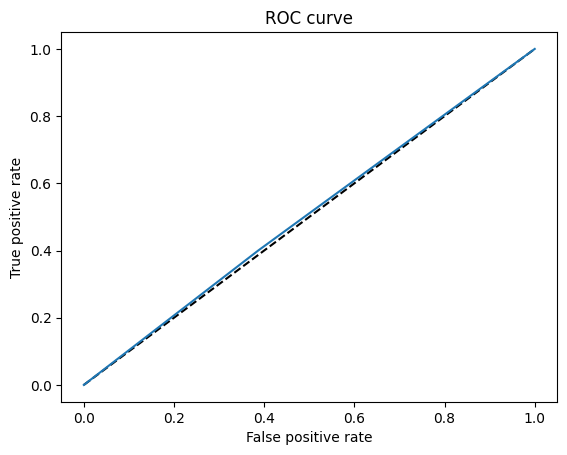

In [13]:
fpr_knn, tpr_knn, thresholds_keras = metrics.roc_curve(knn_y_true, knn_y_pred,pos_label=1)
knn_auc = metrics.auc(fpr_knn, tpr_knn)
print("AUC : ", knn_auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
score_knn = metrics.accuracy_score(knn_y_true,knn_y_pred)
print(score_knn)

0.521505376344086


In [15]:
confusion_matrix(knn_y_true,knn_y_pred)

array([[65, 41],
       [48, 32]])

In [16]:
confusion_matrix(y_true,y_pred)

array([[75, 31],
       [51, 29]])

In [17]:
def cm_plot(y, yp):
    '''
    y: 真实值
    y_pred:预测值
    '''
    '''混淆矩阵绘画'''
    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
 
    cm = confusion_matrix(y, yp)  # 混淆矩阵
    print('混淆矩阵为：\n',cm)
    import matplotlib.pyplot as plt  # 导入作图库
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar()  # 颜色标签
 
    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(y, x),verticalalignment='center',horizontalalignment='center')
            # 这边一个重要的易错点就是关于xy需要添加数值的位置的点要换成（y, x），因为矩阵可视化的xy与实际意义上的坐标是相反的
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    plt.show()

混淆矩阵为：
 [[75 31]
 [51 29]]


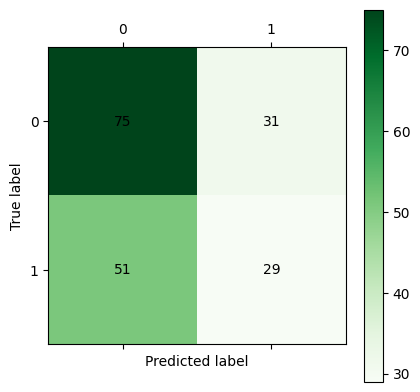

In [18]:
cm_plot(y_true,y_pred)

混淆矩阵为：
 [[65 41]
 [48 32]]


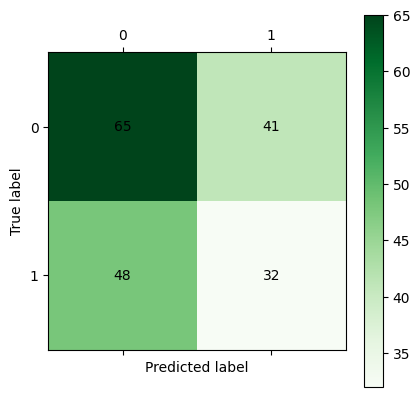

In [19]:
cm_plot(knn_y_true,knn_y_pred)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_y_prob = []
svc_y_true = []
svc_y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    svc.fit(X_train,y_train.ravel())
    svc_y_prob.append(svc.decision_function(X_test))
    pred = svc.predict(X_test)
    svc_y_true.append(y_test)
    svc_y_pred.append(pred)
    
svc_y_prob = np.array(svc_y_prob).reshape(-1)
svc_y_true = np.array(svc_y_true).reshape(-1)
svc_y_pred = np.array(svc_y_pred).reshape(-1)

fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(svc_y_true,svc_y_prob,pos_label=1) 
auc_svc = metrics.auc(fpr_svc,tpr_svc)   
score_svc = metrics.accuracy_score(svc_y_true,svc_y_pred)
print([score_svc,auc_svc])

[0.5483870967741935, 0.5008254716981132]


AUC :  0.5008254716981132


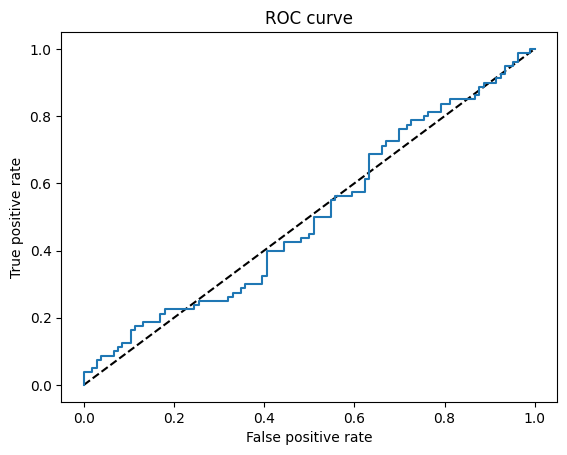

In [21]:
auc = metrics.auc(fpr_svc, tpr_svc)
print("AUC : ", auc_svc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svc, tpr_svc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

混淆矩阵为：
 [[84 22]
 [62 18]]


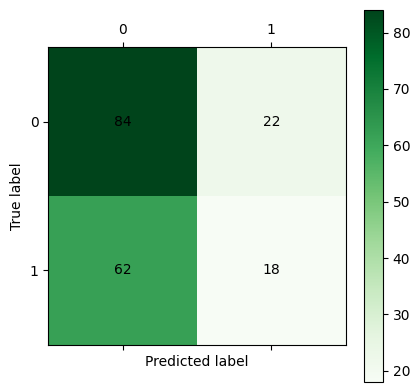

In [22]:
cm_plot(svc_y_true,svc_y_pred)

NameError: name 'fpr_lda' is not defined

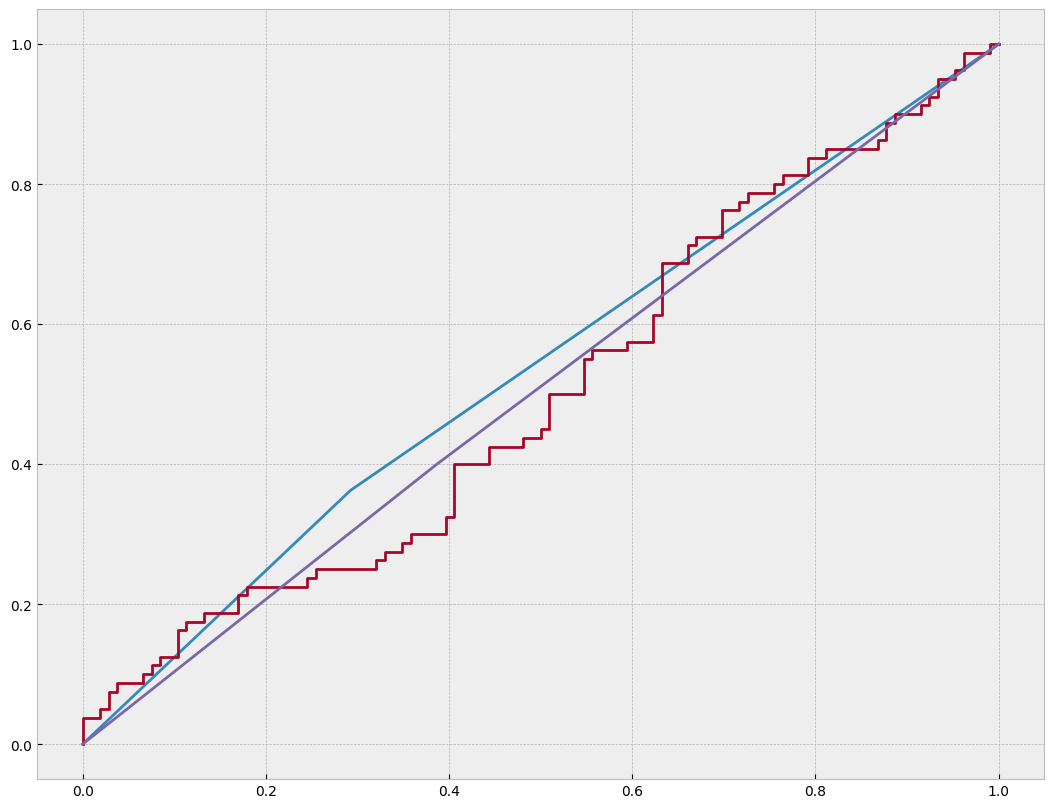

In [23]:
plt.style.use('bmh')
plt.figure(figsize=(13,10))

plt.plot(fpr,tpr,label='logistic regression')                             # 逻辑回归
plt.plot(fpr_svc,tpr_svc,label='svc')                          # 支持向量机模型
plt.plot(fpr_knn,tpr_knn,label='knn') # K近邻
plt.plot(fpr_lda,tpr_lda,label='lda')

plt.legend(loc='lower right',prop={'size':25})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
a = [accuracy_lg,accuracy_knn,score_svc,score_lda]
b = [auc_lg,knn_auc,auc_svc,auc_lda]

labels = ['LG', 'KNN','SVM','LDA']
plt.figure(figsize=(20, 5))
plt.subplot(131)
x = np.arange(len(labels)) # x轴刻度标签位置
width = 0.1 # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, a, width, label='Accuracy')
plt.bar(x + width/2, b, width, label='AUC')
plt.ylabel('Metrics Value')
plt.title('Comparision among 4 algorithms')
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend(loc='lower right')

In [25]:
lda = LinearDiscriminantAnalysis()
lda_y_prob = []
lda_y_true = []
lda_y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    lda.fit(X_train,y_train.ravel())
    lda_y_prob.append(lda.decision_function(X_test))
    pred = lda.predict(X_test)
    lda_y_true.append(y_test)
    lda_y_pred.append(pred)
    
lda_y_prob = np.array(lda_y_prob).reshape(-1)
lda_y_true = np.array(lda_y_true).reshape(-1)
lda_y_pred = np.array(lda_y_pred).reshape(-1)

fpr_lda,tpr_lda,threshold_lda = metrics.roc_curve(lda_y_true,lda_y_prob,pos_label=1) 
auc_lda = metrics.auc(fpr_lda,tpr_lda)   
score_lda = metrics.accuracy_score(lda_y_true,lda_y_pred)
print([score_lda,auc_lda])

[0.5645161290322581, 0.5253537735849056]


AUC :  0.5253537735849056


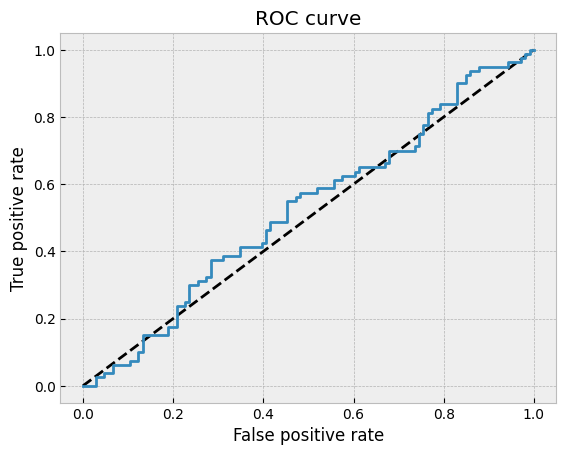

In [26]:
auc = metrics.auc(fpr_lda, tpr_lda)
print("AUC : ", auc_lda)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lda, tpr_lda)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

混淆矩阵为：
 [[75 31]
 [50 30]]


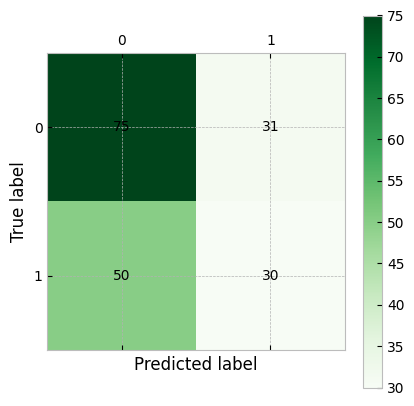

In [27]:
cm_plot(lda_y_true,lda_y_pred)

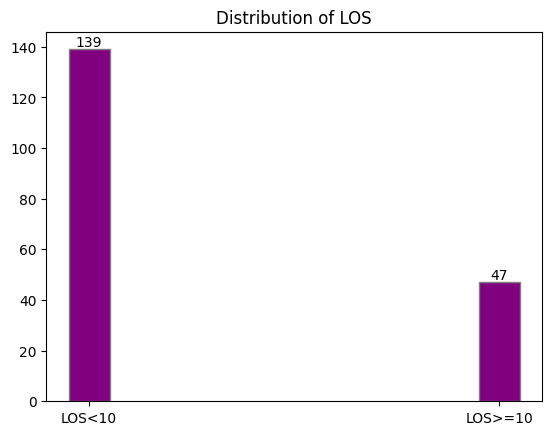

In [6]:
x_data = ['LOS<10','LOS>=10']
y_data = [139,47]
color = 'purple'
bar = plt.bar(x_data,y_data,0.1,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Distribution of LOS")
plt.show()
plt.close()

(0.0, 50.0)

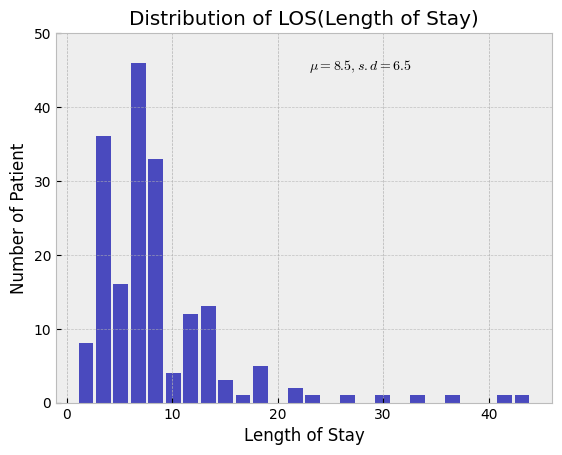

In [31]:
n, bins, patches = plt.hist(x=los, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Length of Stay')
plt.ylabel('Number of Patient')
plt.title('Distribution of LOS(Length of Stay)')
plt.text(23, 45, r'$\mu=8.5, s.d=6.5$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(oob_score=True, random_state=10)
rf_y_prob = []
rf_y_true = []
rf_y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    rf.fit(X_train,y_train.ravel())
    rf_y_prob.append(rf.predict_proba(X_test)[:,1])
    pred = rf.predict(X_test)
    rf_y_true.append(y_test)
    rf_y_pred.append(pred)
    
rf_y_prob = np.array(rf_y_prob).reshape(-1)
rf_y_true = np.array(rf_y_true).reshape(-1)
rf_y_pred = np.array(rf_y_pred).reshape(-1)

fpr_rf,tpr_rf,threshold_rf = metrics.roc_curve(rf_y_true,rf_y_prob,pos_label=1) 
auc_rf = metrics.auc(fpr_rf,tpr_rf)   
score_rf = metrics.accuracy_score(rf_y_true,rf_y_pred)
print([score_rf,auc_rf])

[0.521505376344086, 0.48767688679245286]


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [39]:
gb_y_prob = []
gb_y_true = []
gb_y_pred = []
for train,test in loo.split(X1):
    X_train,X_test = X1[train],X1[test]
    y_train,y_test = y1[train],y1[test]
    
    gb.fit(X_train,y_train.ravel())
    gb_y_prob.append(gb.decision_function(X_test))
    pred = gb.predict(X_test)
    gb_y_true.append(y_test)
    gb_y_pred.append(pred)
    
gb_y_prob = np.array(gb_y_prob).reshape(-1)
gb_y_true = np.array(gb_y_true).reshape(-1)
gb_y_pred = np.array(gb_y_pred).reshape(-1)

fpr_gb,tpr_gb,threshold_gb = metrics.roc_curve(gb_y_true,gb_y_prob,pos_label=1) 
auc_gb = metrics.auc(fpr_gb,tpr_gb)   
score_gb = metrics.accuracy_score(gb_y_true,gb_y_pred)
print([score_gb,auc_gb])

[0.45161290322580644, 0.4732311320754717]
